<a href="https://colab.research.google.com/github/kushalshah7/Gamma-Telescope/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
dataset_path = "/content/drive/My Drive/Colab Notebooks/magic04.data"

In [ ]:
#dataset doesnt have heads
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv(dataset_path, names = cols)
df.head() #for the first 5 data

In [ ]:
df["class"] = (df["class"] == "g").astype(int)
# If class is g it is 1 cause the above condition is true

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


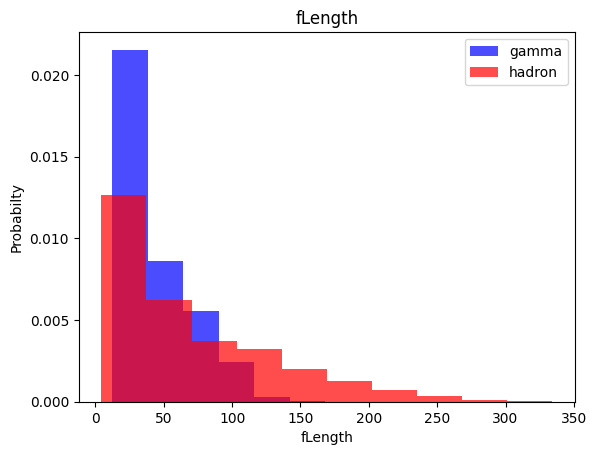

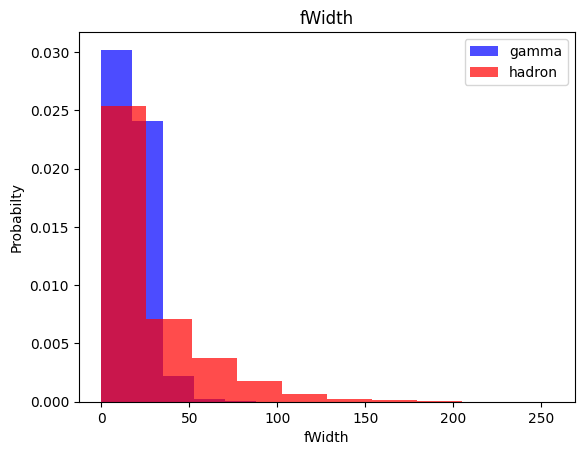

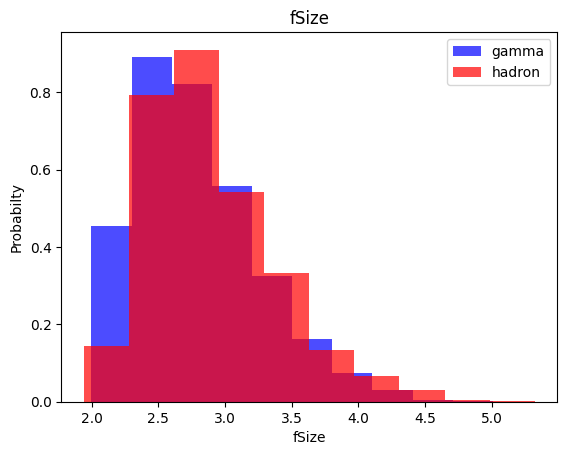

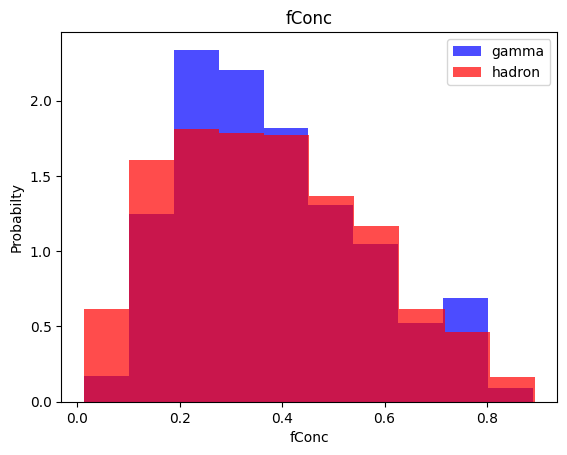

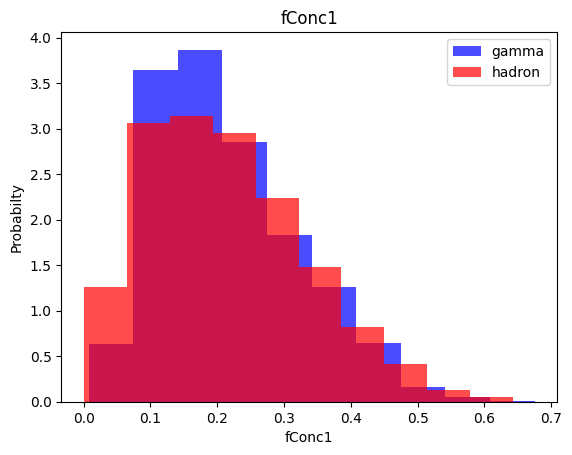

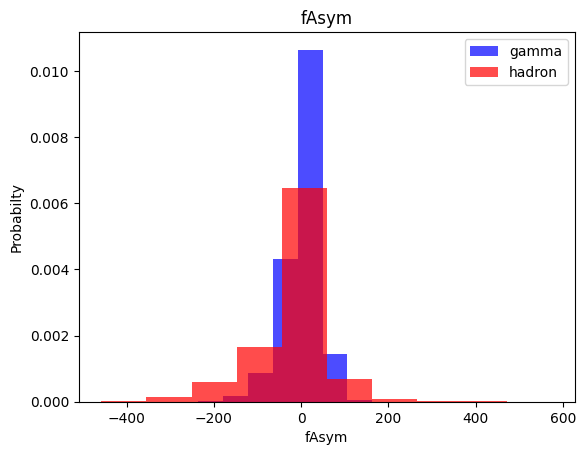

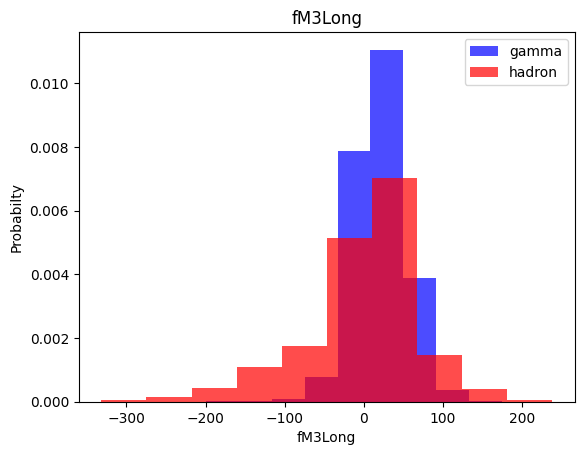

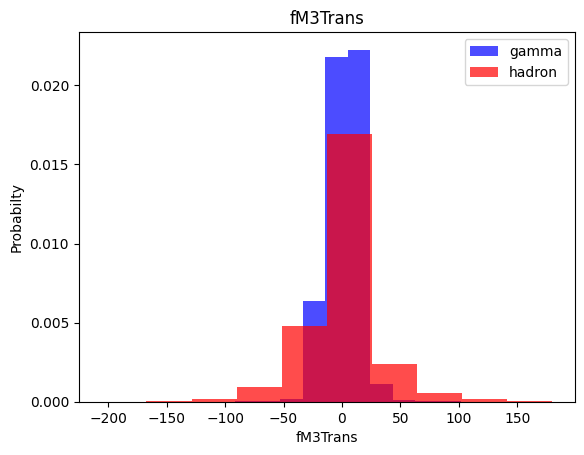

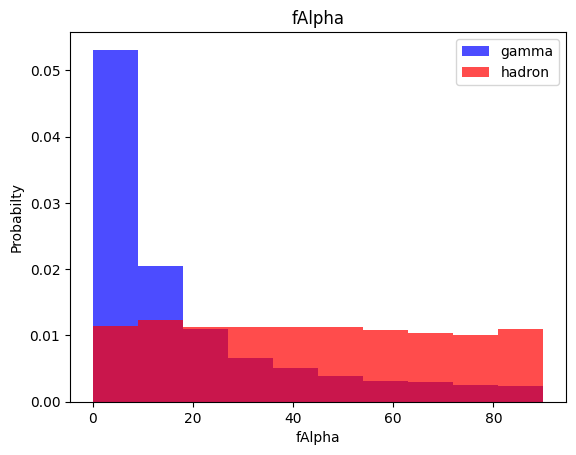

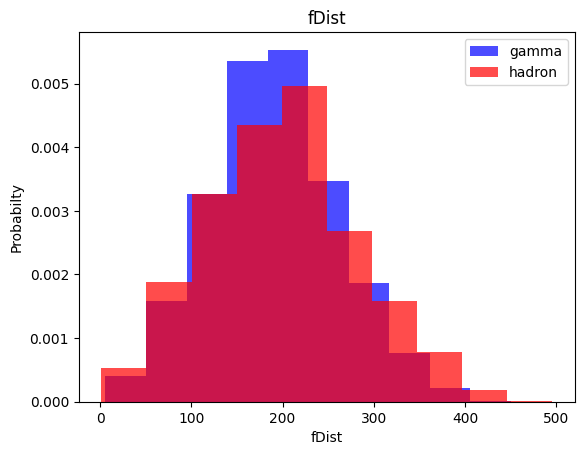

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color="blue", label = "gamma", alpha = 0.7, density = True)
  plt.hist(df[df["class"]==0][label], color="red", label = "hadron", alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probabilty")
  plt.xlabel(label)
  plt.legend()
  plt.show()

**Train, Validation, Test**

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))] )

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample =False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample == "True":
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X,y)

  data = np.hstack((X, np.reshape(y,(-1,1))))

  return data, X,y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample = True)
valid, X_valid, y_valid = scale_dataset(valid, oversample = False)
test, X_test, y_test = scale_dataset(test, oversample = False)

KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73      1313
           1       0.83      0.94      0.88      2491

    accuracy                           0.84      3804
   macro avg       0.84      0.79      0.81      3804
weighted avg       0.84      0.84      0.83      3804



In [ ]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.64      0.73      1352
           1       0.83      0.94      0.88      2452

    accuracy                           0.83      3804
   macro avg       0.84      0.79      0.80      3804
weighted avg       0.83      0.83      0.83      3804



Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
lg_model = GaussianNB()
lg_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = lg_model.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.37      0.48      1313
           1       0.73      0.91      0.81      2491

    accuracy                           0.72      3804
   macro avg       0.71      0.64      0.64      3804
weighted avg       0.72      0.72      0.70      3804



In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.37      0.49      1352
           1       0.73      0.92      0.81      2452

    accuracy                           0.72      3804
   macro avg       0.72      0.64      0.65      3804
weighted avg       0.72      0.72      0.69      3804



Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lg_model.predict(X_valid)
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67      1313
           1       0.81      0.91      0.85      2491

    accuracy                           0.80      3804
   macro avg       0.79      0.75      0.76      3804
weighted avg       0.79      0.80      0.79      3804



SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svm_model.predict(X_valid)
print(classification_report(y_valid, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1313
           1       0.86      0.96      0.91      2491

    accuracy                           0.87      3804
   macro avg       0.88      0.83      0.85      3804
weighted avg       0.87      0.87      0.87      3804



In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.69      0.77      1352
           1       0.85      0.95      0.90      2452

    accuracy                           0.86      3804
   macro avg       0.87      0.82      0.83      3804
weighted avg       0.86      0.86      0.85      3804

